In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb
import datetime
import calendar 

%matplotlib inline

In [2]:
df = pd.read_csv("fordgobiketripdata.csv")

In [4]:
df_clean = df.copy()
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0)
df_clean['member_gender'] = df_clean['member_gender'].fillna(0)
df_clean['end_station_id'] = df_clean['end_station_id'].fillna(0)
df_clean['end_station_name'] = df_clean['end_station_name'].fillna(0)
df_clean['start_station_id'] = df_clean['start_station_id'].fillna(0)
df_clean['start_station_name'] = df_clean['start_station_name'].fillna(0)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['send_station_id'] = df_clean['end_station_id'].astype(int)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)
df_clean['start_time'] = pd.to_datetime(df_clean.start_time)
df_clean['end_time'] = pd.to_datetime(df_clean.end_time)
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_day'] = df_clean['end_time'].dt.strftime('%a')
df_clean['end_dow']= df_clean['end_time'].dt.dayofweek
df_clean['start_dow']= df_clean['start_time'].dt.dayofweek
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean['start_Hour']= pd.DatetimeIndex(df_clean['start_time']).hour
df_clean['end_Hour']= pd.DatetimeIndex(df_clean['end_time']).hour
df_clean.drop(['bike_share_for_all_trip','bike_id','start_station_id','end_station_id','send_station_id'], axis=1,inplace=True)

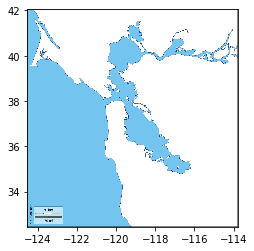

In [5]:
img = plt.imread("BayArea.gif")
ext=[-124.55, -113.80, 32.45, 42.05]
plt.imshow(img, zorder=0, extent=ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()

In [6]:
dfgr5=df_clean.groupby(["start_station_latitude","start_station_longitude",'user_type'],as_index=False) ['duration_sec'].count()
dfgr6 = dfgr5.rename({'duration_sec':'Count'}, axis=1)


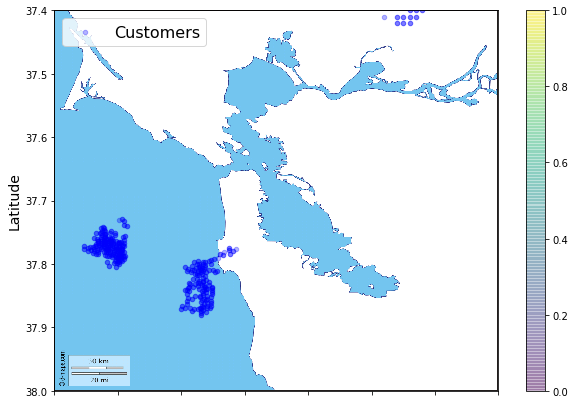

In [14]:
import matplotlib.image as mpimg
bayarea=mpimg.imread('BayArea.gif')
img = plt.imread('BayArea.gif')
ext=[-122.5, -121.8, 38.0, 37.4]
ax = dfgr6.plot(kind="scatter", x="start_station_longitude", y="start_station_latitude", 
                    cmap=plt.get_cmap("jet"),label="Customers",figsize=(10,7),
                    c='b',
                   colorbar=True, alpha=0.3,zorder=1)

plt.imshow(bayarea, zorder=0, extent=ext)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()
